# 데이터셋 확인

## 0. 필요 라이브러리 import

In [1]:
#필요한 패키지를 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False


## 1. 데이터 불러오기

* 2019년 7월 17일 ~ 2020년 09월 30일까지의 서울, 경기도 업종별 배달 주문건수 및 기상, 환경 코로나 데이터

In [2]:
raw_data = pd.read_csv('data/최종데이터/data_final.csv', encoding='utf-8', index_col=0)
raw_data

,광역시도명,날짜,업종명,주문건수,기온(°C),풍속(m/s),습도(%),증기압(hPa),지면온도(°C),SO2,CO,O3,NO2,PM10,PM25,확진자수
0,경기도,2019-07-17,도시락,96,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
1,경기도,2019-07-17,돈까스/일식,198,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
2,경기도,2019-07-17,배달전문업체,108,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
3,경기도,2019-07-17,분식,554,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
4,경기도,2019-07-17,심부름,4,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,서울,2020-09-30,카페/디저트,167,18.800,1.700,77.000,16.600,17.50,0.003,0.407,0.025,0.016,29.213,18.445,30.0
13817,서울,2020-09-30,패스트푸드,916,18.800,1.700,77.000,16.600,17.50,0.003,0.407,0.025,0.016,29.213,18.445,30.0
13818,서울,2020-09-30,피자,130,18.800,1.700,77.000,16.600,17.50,0.003,0.407,0.025,0.016,29.213,18.445,30.0
13819,서울,2020-09-30,한식,282,18.800,1.700,77.000,16.600,17.50,0.003,0.407,0.025,0.016,29.213,18.445,30.0


In [4]:
## 컬럼명 수정

raw_data.columns = ['광역시도명', '날짜', '업종명', '주문건수', '기온', '풍속', '습도', '증기압',
       '지면온도', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '확진자수']

In [5]:
raw_data

,광역시도명,날짜,업종명,주문건수,기온,풍속,습도,증기압,지면온도,SO2,CO,O3,NO2,PM10,PM25,확진자수
0,경기도,2019-07-17,도시락,96,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
1,경기도,2019-07-17,돈까스/일식,198,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
2,경기도,2019-07-17,배달전문업체,108,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
3,경기도,2019-07-17,분식,554,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
4,경기도,2019-07-17,심부름,4,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,서울,2020-09-30,카페/디저트,167,18.800,1.700,77.000,16.600,17.50,0.003,0.407,0.025,0.016,29.213,18.445,30.0
13817,서울,2020-09-30,패스트푸드,916,18.800,1.700,77.000,16.600,17.50,0.003,0.407,0.025,0.016,29.213,18.445,30.0
13818,서울,2020-09-30,피자,130,18.800,1.700,77.000,16.600,17.50,0.003,0.407,0.025,0.016,29.213,18.445,30.0
13819,서울,2020-09-30,한식,282,18.800,1.700,77.000,16.600,17.50,0.003,0.407,0.025,0.016,29.213,18.445,30.0


### - 데이터 분리
* 서울시와 경기도로 분리

In [5]:
## 서울, 경기도 분리

seoul = raw_data.loc[raw_data['광역시도명']=='서울']

gg = raw_data.loc[raw_data['광역시도명'] == '경기도']


## 2. 데이터셋 확인

### 1) NULL 값 확인

In [6]:
raw_data.isnull().sum()

광역시도명          0
날짜             0
업종명            0
주문건수           0
기온             0
풍속             0
습도             0
증기압            0
지면온도           0
SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM25           0
전일대비증감수     7256
사망자수        7256
격리해제수       7444
격리중환자수      8430
지역발생수       8430
해외유입수       8430
10만명당발생률    7286
dtype: int64

### 2) 결측치 시각화

#### 1-1) 서울시

In [7]:
seoul.isnull().sum()

광역시도명          0
날짜             0
업종명            0
주문건수           0
기온             0
풍속             0
습도             0
증기압            0
지면온도           0
SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM25           0
전일대비증감수     3578
사망자수        3578
격리해제수       3670
격리중환자수      4161
지역발생수       4161
해외유입수       4161
10만명당발생률    3592
dtype: int64

<AxesSubplot:>

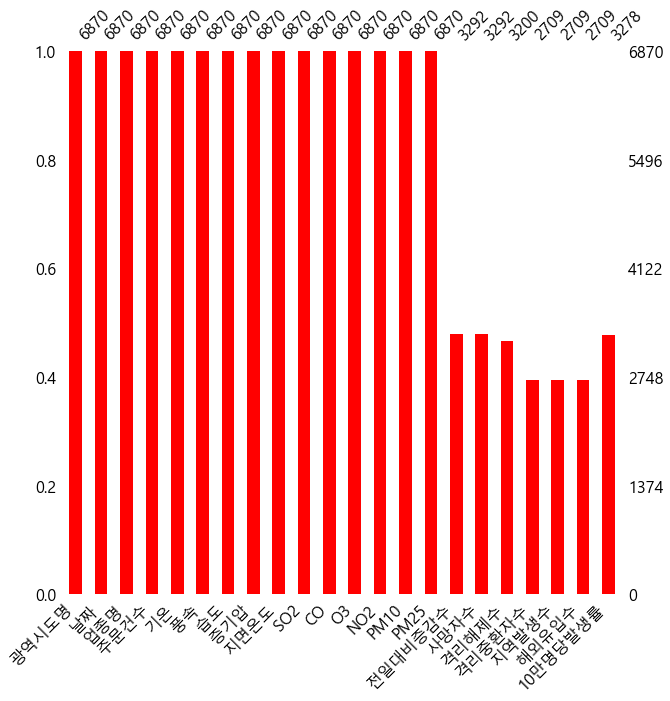

In [8]:
## 서울시 결측치 시각화

msno.bar(df=seoul.iloc[:, :], figsize=(10, 10), color='red')

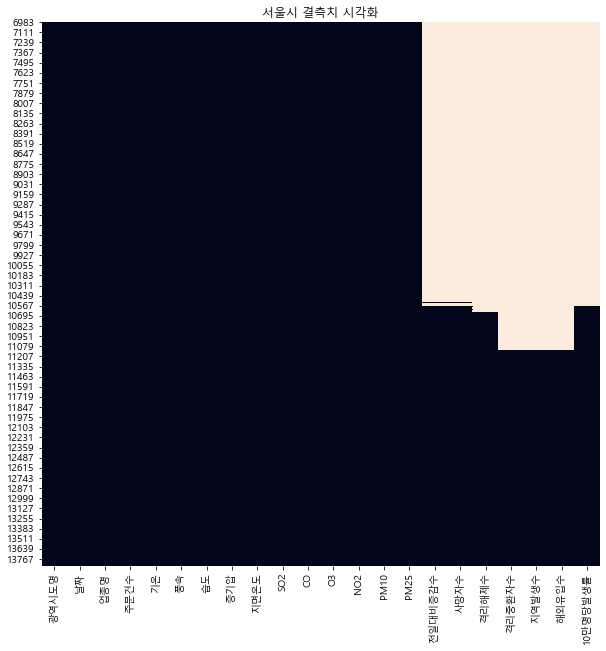

In [9]:
plt.figure(figsize=(10, 10))
plt.title('서울시 결측치 시각화')
sns.heatmap(seoul.isnull(), cbar=False)
plt.show()

코로나 데이터 중 '격리해제수', '격리중환자수', '지역발생수', 해외유입수', '10만명당발생률'은  
'전일대비증감수'를 통해서 설명 가능할 것으로 판단하여 삭제

In [10]:
# 전일대비증감수만 남기고 코로나 데이터 삭제

seoul = seoul.iloc[:, :16]
seoul

,광역시도명,날짜,업종명,주문건수,기온,풍속,습도,증기압,지면온도,SO2,CO,O3,NO2,PM10,PM25,전일대비증감수
6983,서울,2019-07-17,도시락,12,25.542,1.179,74.542,24.029,25.746,0.004,0.571,0.035,0.026,61.769,48.681,NaN
6984,서울,2019-07-17,돈까스/일식,13,25.542,1.179,74.542,24.029,25.746,0.004,0.571,0.035,0.026,61.769,48.681,NaN
6985,서울,2019-07-17,배달전문업체,7,25.542,1.179,74.542,24.029,25.746,0.004,0.571,0.035,0.026,61.769,48.681,NaN
6986,서울,2019-07-17,분식,312,25.542,1.179,74.542,24.029,25.746,0.004,0.571,0.035,0.026,61.769,48.681,NaN
6987,서울,2019-07-17,아시안/양식,103,25.542,1.179,74.542,24.029,25.746,0.004,0.571,0.035,0.026,61.769,48.681,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13848,서울,2020-09-30,카페/디저트,167,18.800,1.700,77.000,16.600,17.500,0.003,0.407,0.025,0.016,29.213,18.445,51.0
13849,서울,2020-09-30,패스트푸드,916,18.800,1.700,77.000,16.600,17.500,0.003,0.407,0.025,0.016,29.213,18.445,51.0
13850,서울,2020-09-30,피자,130,18.800,1.700,77.000,16.600,17.500,0.003,0.407,0.025,0.016,29.213,18.445,51.0
13851,서울,2020-09-30,한식,282,18.800,1.700,77.000,16.600,17.500,0.003,0.407,0.025,0.016,29.213,18.445,51.0


코로나 첫 발생 날짜(2020-03-01) 이전의 전일대비증감수 데이터는 모두 0으로 처리



#### 1-2) 경기도

In [11]:
gg.isnull().sum()

광역시도명          0
날짜             0
업종명            0
주문건수           0
기온             0
풍속             0
습도             0
증기압            0
지면온도           0
SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM25           0
전일대비증감수     3678
사망자수        3678
격리해제수       3774
격리중환자수      4269
지역발생수       4269
해외유입수       4269
10만명당발생률    3694
dtype: int64

<AxesSubplot:>

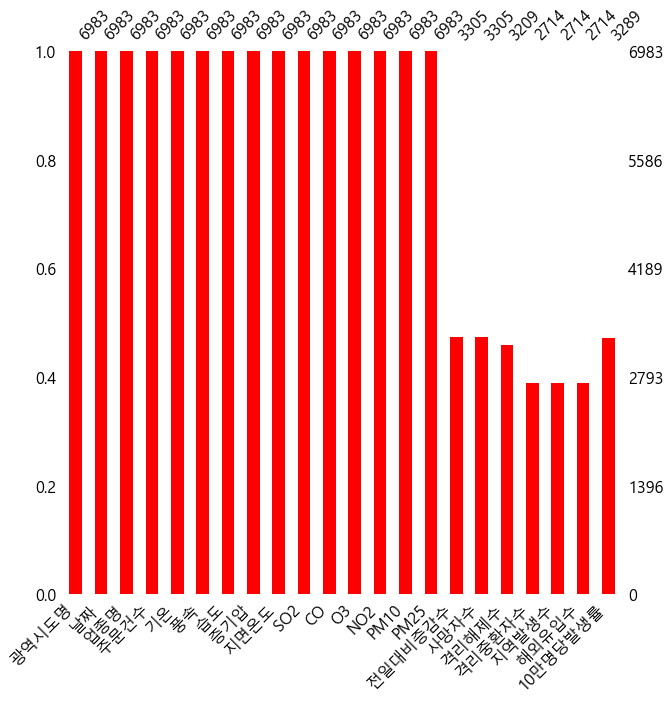

In [12]:
## 경기도 결측치 시각화

msno.bar(df=gg.iloc[:, :], figsize=(10, 10), color='red')

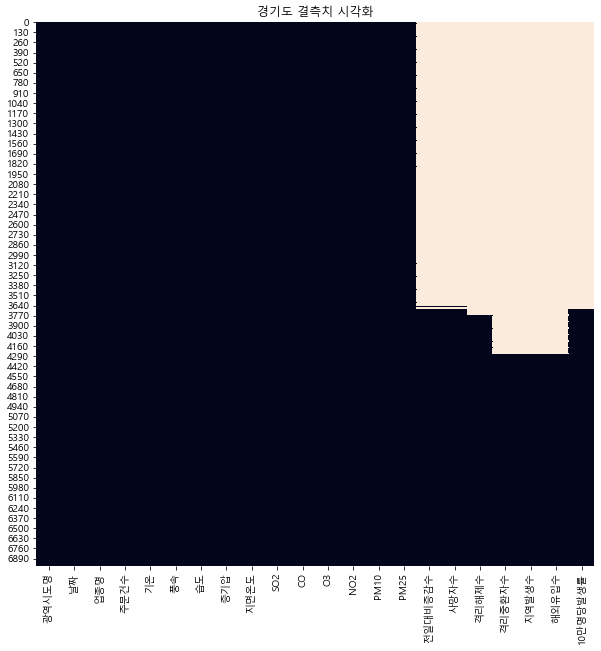

In [13]:
plt.figure(figsize=(10, 10))
plt.title('경기도 결측치 시각화')
sns.heatmap(gg.isnull(), cbar=False)
plt.show()

In [14]:
gg = gg.iloc[:, :16]
gg

,광역시도명,날짜,업종명,주문건수,기온,풍속,습도,증기압,지면온도,SO2,CO,O3,NO2,PM10,PM25,전일대비증감수
0,경기도,2019-07-17,도시락,96,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,NaN
1,경기도,2019-07-17,돈까스/일식,198,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,NaN
2,경기도,2019-07-17,배달전문업체,108,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,NaN
3,경기도,2019-07-17,분식,554,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,NaN
4,경기도,2019-07-17,심부름,4,24.986,0.948,82.192,25.548,27.07,0.003,0.568,0.038,0.022,63.998,43.787,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,경기도,2020-09-30,카페/디저트,1797,15.480,0.380,93.800,16.420,15.40,0.003,0.452,0.027,0.013,34.083,20.592,26.0
6979,경기도,2020-09-30,패스트푸드,1032,15.480,0.380,93.800,16.420,15.40,0.003,0.452,0.027,0.013,34.083,20.592,26.0
6980,경기도,2020-09-30,피자,809,15.480,0.380,93.800,16.420,15.40,0.003,0.452,0.027,0.013,34.083,20.592,26.0
6981,경기도,2020-09-30,한식,1956,15.480,0.380,93.800,16.420,15.40,0.003,0.452,0.027,0.013,34.083,20.592,26.0


### 3) 결측치 처리

* 코로나 확진자 이전의 데이터는 모두 0으로 처리
* 코로나 확진자 데이터 첫 시작일(2020-03-01) 이후 2일은 증감수가 없다고 판단하여 0으로 처리